Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

In [33]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import keras

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:

# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])                )

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.3692 - val_loss: 0.2648
Epoch 2/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.2593 - val_loss: 0.2556
Epoch 3/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.2477 - val_loss: 0.2420
Epoch 4/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.2388 - val_loss: 0.2361
Epoch 5/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.2349 - val_loss: 0.2329
Epoch 6/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.2324 - val_loss: 0.2307
Epoch 7/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.2307 - val_loss: 0.2293
Epoch 8/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.2293 - val_loss: 0.2278
Epoch 9/100
60000/60000 [=============================

60000/60000 [==============================] - 3s 58us/step - loss: 0.1951 - val_loss: 0.1953
Epoch 75/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.1950 - val_loss: 0.1951
Epoch 76/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.1947 - val_loss: 0.1948
Epoch 77/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.1944 - val_loss: 0.1960
Epoch 78/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.1940 - val_loss: 0.1944
Epoch 79/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.1938 - val_loss: 0.1932
Epoch 80/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1934 - val_loss: 0.1939
Epoch 81/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.1929 - val_loss: 0.1937
Epoch 82/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.1920 - val_loss: 0.1929
Epoch 83/100
60000/60000 [========================

In [10]:
noise = np.random.normal(20,4, (4,4))
noise_preds = decoder.predict(noise)

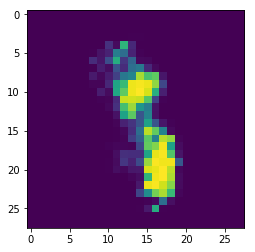

In [14]:
plt.imshow(noise_preds[1].reshape(28,28))

In [16]:
encoded_imgs = encoder.predict(xtest)

np.max(encoded_imgs)

50.756348

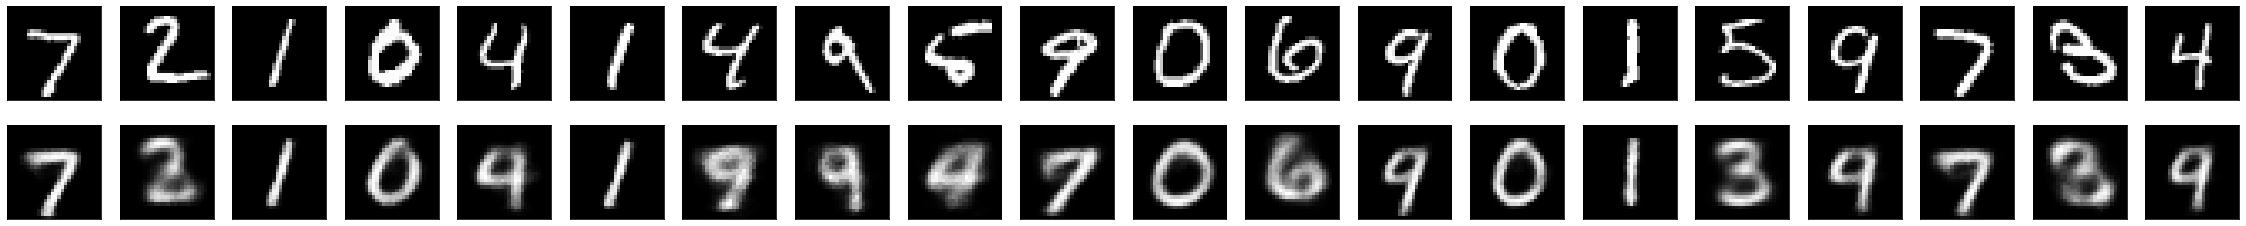

In [17]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [18]:
encoded_imgs

array([[10.915931 ,  2.977148 , 27.044727 , 28.091213 ],
       [ 4.960381 ,  0.       ,  4.912587 ,  3.227916 ],
       [12.855605 ,  0.       , 45.800533 , 19.69311  ],
       ...,
       [ 4.016479 ,  0.       , 14.599002 , 12.466936 ],
       [ 3.1431332,  0.       , 13.0110035,  1.9472578],
       [ 3.577699 ,  6.4040346,  5.6094666, 13.719032 ]], dtype=float32)

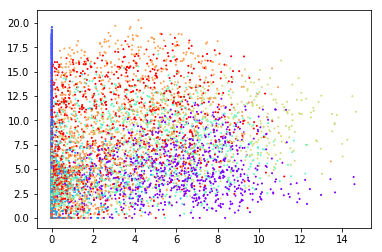

In [19]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
# plt.show()

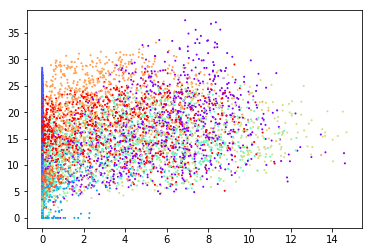

In [20]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()

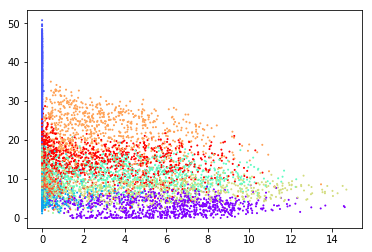

In [21]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')
# plt.show()

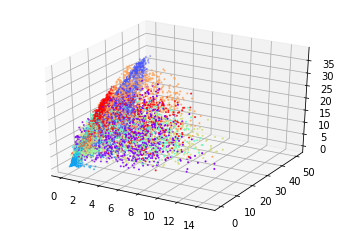

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)

# Assignment
### 1. Change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot

In [50]:
dims = list(range(2,18,2))

losses = []
for dim in dims:
    encoding_dim = dim  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

    # this is our input placeholder
    x = input_img = Input(shape=(784,))
    # "encoded" is the encoded representation of the input
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)


    # "decoded" is the lossy reconstruction of the input
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)

    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)

    encoder = Model(input_img, encoded)

    # create a placeholder for an encoded (32-dimensional) input
    encoded_input = Input(shape=(encoding_dim,))
    # retrieve the last layer of the autoencoder model
    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]

    # create the decoder model
    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))
    
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    
    history = autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
    
    
    losses.append(history.history['val_loss'][-1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.3540 - val_loss: 0.2644
Epoch 2/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.2595 - val_loss: 0.2560
Epoch 3/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.2537 - val_loss: 0.2530
Epoch 4/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.2517 - val_loss: 0.2517
Epoch 5/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.2508 - val_loss: 0.2511
Epoch 6/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.2502 - val_loss: 0.2512
Epoch 7/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.2497 - val_loss: 0.2499
Epoch 8/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.2491 - val_loss: 0.2493
Epoch 9/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.2484 - val_loss: 0.2

60000/60000 [==============================] - 4s 66us/step - loss: 0.1950 - val_loss: 0.1954
Epoch 78/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1949 - val_loss: 0.1954
Epoch 79/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1947 - val_loss: 0.1951
Epoch 80/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1943 - val_loss: 0.1949
Epoch 81/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1940 - val_loss: 0.1945
Epoch 82/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1937 - val_loss: 0.1938
Epoch 83/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1936 - val_loss: 0.1948
Epoch 84/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1933 - val_loss: 0.1941
Epoch 85/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1931 - val_loss: 0.1936
Epoch 86/100
60000/60000 [========================

60000/60000 [==============================] - 4s 65us/step - loss: 0.1697 - val_loss: 0.1692
Epoch 54/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1689 - val_loss: 0.1694
Epoch 55/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1685 - val_loss: 0.1674
Epoch 56/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1678 - val_loss: 0.1673
Epoch 57/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1674 - val_loss: 0.1674
Epoch 58/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1666 - val_loss: 0.1667
Epoch 59/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1663 - val_loss: 0.1665
Epoch 60/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1657 - val_loss: 0.1662
Epoch 61/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1651 - val_loss: 0.1661
Epoch 62/100
60000/60000 [========================

60000/60000 [==============================] - 4s 66us/step - loss: 0.1611 - val_loss: 0.1611
Epoch 30/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1603 - val_loss: 0.1605
Epoch 31/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1597 - val_loss: 0.1585
Epoch 32/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1591 - val_loss: 0.1589
Epoch 33/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1585 - val_loss: 0.1582
Epoch 34/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1579 - val_loss: 0.1579
Epoch 35/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1576 - val_loss: 0.1574
Epoch 36/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1569 - val_loss: 0.1568
Epoch 37/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1565 - val_loss: 0.1559
Epoch 38/100
60000/60000 [========================

60000/60000 [==============================] - 4s 66us/step - loss: 0.2299 - val_loss: 0.2254
Epoch 6/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.2209 - val_loss: 0.2134
Epoch 7/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.2089 - val_loss: 0.2026
Epoch 8/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1996 - val_loss: 0.1945
Epoch 9/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1922 - val_loss: 0.1896
Epoch 10/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1873 - val_loss: 0.1853
Epoch 11/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.1833 - val_loss: 0.1809
Epoch 12/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1800 - val_loss: 0.1777
Epoch 13/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1773 - val_loss: 0.1755
Epoch 14/100
60000/60000 [============================

60000/60000 [==============================] - 4s 66us/step - loss: 0.1302 - val_loss: 0.1312
Epoch 82/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1300 - val_loss: 0.1302
Epoch 83/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1297 - val_loss: 0.1293
Epoch 84/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1297 - val_loss: 0.1300
Epoch 85/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1294 - val_loss: 0.1298
Epoch 86/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1293 - val_loss: 0.1288
Epoch 87/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1291 - val_loss: 0.1290
Epoch 88/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1290 - val_loss: 0.1288
Epoch 89/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1289 - val_loss: 0.1293
Epoch 90/100
60000/60000 [========================

60000/60000 [==============================] - 4s 66us/step - loss: 0.1200 - val_loss: 0.1193
Epoch 58/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1198 - val_loss: 0.1190
Epoch 59/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1196 - val_loss: 0.1189
Epoch 60/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1193 - val_loss: 0.1179
Epoch 61/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1191 - val_loss: 0.1178
Epoch 62/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1188 - val_loss: 0.1179
Epoch 63/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1185 - val_loss: 0.1192
Epoch 64/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1184 - val_loss: 0.1171
Epoch 65/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1181 - val_loss: 0.1168
Epoch 66/100
60000/60000 [========================

60000/60000 [==============================] - 4s 66us/step - loss: 0.1236 - val_loss: 0.1224
Epoch 34/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1231 - val_loss: 0.1224
Epoch 35/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1226 - val_loss: 0.1201
Epoch 36/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1219 - val_loss: 0.1210
Epoch 37/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1214 - val_loss: 0.1205
Epoch 38/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1210 - val_loss: 0.1199
Epoch 39/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1205 - val_loss: 0.1198
Epoch 40/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1200 - val_loss: 0.1203
Epoch 41/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1196 - val_loss: 0.1181
Epoch 42/100
60000/60000 [========================

60000/60000 [==============================] - 4s 66us/step - loss: 0.1726 - val_loss: 0.1693
Epoch 10/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1678 - val_loss: 0.1634
Epoch 11/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.1634 - val_loss: 0.1607
Epoch 12/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1600 - val_loss: 0.1570
Epoch 13/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1571 - val_loss: 0.1536
Epoch 14/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1544 - val_loss: 0.1525
Epoch 15/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1522 - val_loss: 0.1491
Epoch 16/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1498 - val_loss: 0.1506
Epoch 17/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1478 - val_loss: 0.1452
Epoch 18/100
60000/60000 [========================

60000/60000 [==============================] - 4s 66us/step - loss: 0.1148 - val_loss: 0.1145
Epoch 86/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1146 - val_loss: 0.1151
Epoch 87/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1145 - val_loss: 0.1142
Epoch 88/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1144 - val_loss: 0.1154
Epoch 89/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1143 - val_loss: 0.1136
Epoch 90/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1139 - val_loss: 0.1144
Epoch 91/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.1139 - val_loss: 0.1139
Epoch 92/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1138 - val_loss: 0.1132
Epoch 93/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1136 - val_loss: 0.1133
Epoch 94/100
60000/60000 [========================

60000/60000 [==============================] - 4s 66us/step - loss: 0.1082 - val_loss: 0.1068
Epoch 62/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1079 - val_loss: 0.1077
Epoch 63/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1077 - val_loss: 0.1088
Epoch 64/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1074 - val_loss: 0.1066
Epoch 65/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1072 - val_loss: 0.1071
Epoch 66/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1070 - val_loss: 0.1060
Epoch 67/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.1067 - val_loss: 0.1083
Epoch 68/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1067 - val_loss: 0.1060
Epoch 69/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1064 - val_loss: 0.1059
Epoch 70/100
60000/60000 [========================

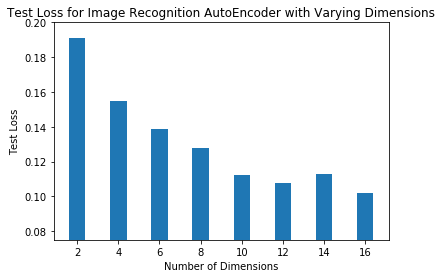

In [52]:
plt.bar(dims, losses)
plt.title('Test Loss for Image Recognition AutoEncoder with Varying Dimensions')
plt.xlabel('Number of Dimensions')
plt.xticks(dims)
plt.ylabel('Test Loss')
plt.ylim(0.075, 0.2)
plt.show()

Judging by the graph, 16 dimensions appears to yield the lowest loss score

### 2. Using the previous assignment's model of detecting images, how does the accuracy change when you run the digit-prediction model on these 'decoded' values?


In [65]:
#reload x/y data
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [67]:
#run best model, then decode images
dim = 16

encoding_dim = dim  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

loss = []

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))
    
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    
history = autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
    
    
loss.append(history.history['val_loss'][-1])

encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.3218 - val_loss: 0.2619
Epoch 2/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.2536 - val_loss: 0.2430
Epoch 3/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.2328 - val_loss: 0.2227
Epoch 4/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.2137 - val_loss: 0.2021
Epoch 5/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.1972 - val_loss: 0.1910
Epoch 6/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.1863 - val_loss: 0.1815
Epoch 7/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.1780 - val_loss: 0.1728
Epoch 8/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.1703 - val_loss: 0.1667
Epoch 9/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1640 - val_loss: 0.1

60000/60000 [==============================] - 4s 66us/step - loss: 0.1039 - val_loss: 0.1040
Epoch 78/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1037 - val_loss: 0.1021
Epoch 79/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1035 - val_loss: 0.1025
Epoch 80/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1033 - val_loss: 0.1031
Epoch 81/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1032 - val_loss: 0.1023
Epoch 82/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1030 - val_loss: 0.1021
Epoch 83/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1028 - val_loss: 0.1030
Epoch 84/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1026 - val_loss: 0.1015
Epoch 85/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1025 - val_loss: 0.1013
Epoch 86/100
60000/60000 [========================

In [71]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.optimizers import RMSprop

#run best model from last week's assignment
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(ytrain, num_classes)
y_test = keras.utils.to_categorical(ytest, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.fit(decoded_imgs, y_test,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
loss.append(model.evaluate(x_test, y_test, verbose=0)[0])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_236 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_237 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_238 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 2s 196

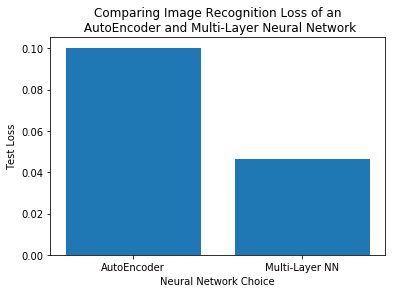

In [72]:
models = ['AutoEncoder', 'Multi-Layer NN']
plt.bar(models, loss)
plt.xlabel('Neural Network Choice')
plt.title('Comparing Image Recognition Loss of an\n AutoEncoder and Multi-Layer Neural Network')
#plt.xticks(dims)
plt.ylabel('Test Loss')
#plt.ylim(0.075, 0.2)
plt.show()

Judging the above graph, the MLNN actually appears to perform better than the AutoEncoder.

### 3. Apply noise to *_only_* the input of the autoencoder (not the output). demonstrate that your autoencoder can strip out noise.

In [76]:
#import random noise packages
from skimage.util import random_noise

xtrain_noise = random_noise(xtrain, seed = 1234, var = 0.25)
xtest_noise = random_noise(xtest, seed = 1234, var = 0.25)

#rerun encoder with noise

loss = []

encoding_dim = dim  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))
    
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    
autoencoder.fit(xtrain_noise, xtrain_noise,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest_noise, xtest_noise))
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.5973 - val_loss: 0.5649
Epoch 2/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.5644 - val_loss: 0.5643
Epoch 3/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.5639 - val_loss: 0.5638
Epoch 4/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.5634 - val_loss: 0.5631
Epoch 5/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.5620 - val_loss: 0.5608
Epoch 6/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.5591 - val_loss: 0.5575
Epoch 7/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.5563 - val_loss: 0.5552
Epoch 8/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.5540 - val_loss: 0.5529
Epoch 9/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.5521 - val_loss: 0.

60000/60000 [==============================] - 4s 75us/step - loss: 0.5290 - val_loss: 0.5287
Epoch 78/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.5290 - val_loss: 0.5289
Epoch 79/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.5290 - val_loss: 0.5292
Epoch 80/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.5289 - val_loss: 0.5285
Epoch 81/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.5288 - val_loss: 0.5292
Epoch 82/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.5288 - val_loss: 0.5282
Epoch 83/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.5287 - val_loss: 0.5284
Epoch 84/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.5287 - val_loss: 0.5281
Epoch 85/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.5286 - val_loss: 0.5281
Epoch 86/100
60000/60000 [========================

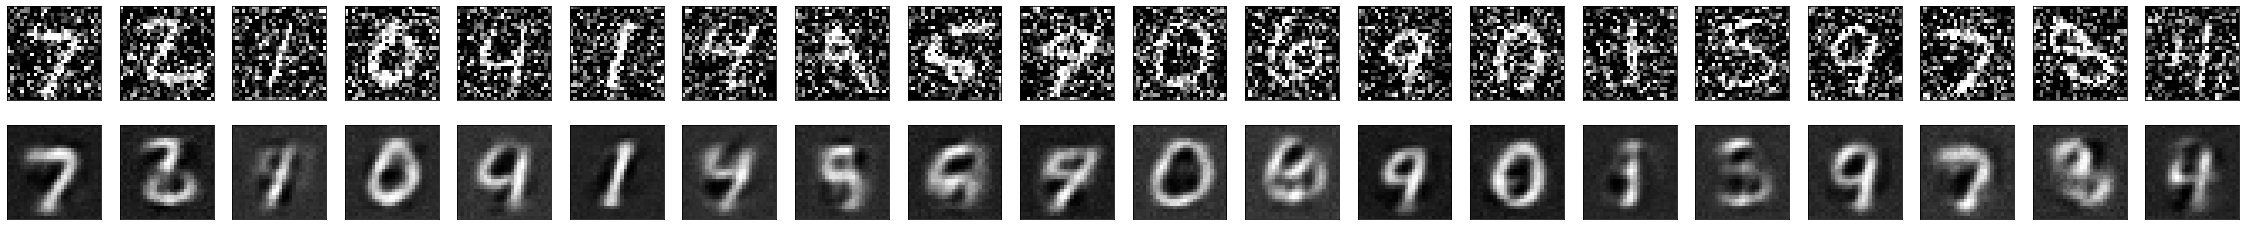

In [77]:

encoded_imgs = encoder.predict(xtest_noise)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Looking at the above image comparisons, you can tell that, for the most part, the auto-encoder can strip out most of the input noise. It does not do a perfect job with noise at 0.25 variance, but I think that at least ~60% of the above images are correct and discernable.